### Deliverable 3: Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME' and 'AFFILIATION'.
application_df.drop(["EIN", "NAME","AFFILIATION"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

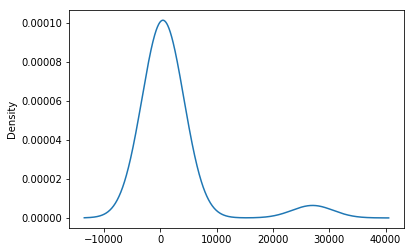

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 600].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
         ...  
C3200        2
C1246        2
C1267        2
C1256        2
C1283        1
C4120        1
C2561        1
C1580        1
C8210        1
C1248        1
C5200        1
C1236        1
C2570        1
C4500        1
C1570        1
C1900        1
C2170        1
C3700        1
C2600        1
C2190        1
C2500        1
C1820        1
C2380        1
C1370        1
C6100        1
C4200        1
C2150        1
C1732        1
C1728        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

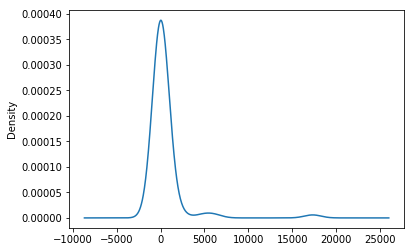

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                3420      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 8,941
Trainable params: 8,941
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model, using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 30625.7390 - accuracy: 0.4898
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 73855.6557 - accuracy: 0.4961
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 21346.0198 - accuracy: 0.4979
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 40109.1854 - accuracy: 0.5081
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 29441.3806 - accuracy: 0.4925
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 5630.0476 - accuracy: 0.4880
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 7037.9555 - accuracy: 0.5165
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 26558.0967 - accuracy: 0.5049
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 2528.6559 - accuracy: 0.5114
Epoch 10/100
804/804 [==============================] - 1s

804/804 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5373
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5300
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5351
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5359
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5247
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5352
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5368
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5294
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 

In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=500)
    #save_freq=250)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
493/804 [=================>............] - ETA: 0s - loss: 0.6332 - accuracy: 0.6332
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 1ms/step - loss: 0.6291 - accuracy: 0.6384
Epoch 2/100
163/804 [=====>........................] - ETA: 1s - loss: 0.6398 - accuracy: 0.6424
Epoch 00002: saving model to checkpoints/weights.02.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6210 - accuracy: 0.6526
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6200 - accuracy: 0.6529
Epoch 3/100
376/804 [=============>................] - ETA: 0s - loss: 0.6058 - accuracy: 0.6589
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6556
Epoch 4/100
 65/804 [=>............................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6335
Epoch 00004: saving model to che

804/804 [==============================] - 2s 2ms/step - loss: 0.5994 - accuracy: 0.6635
Epoch 26/100
394/804 [=============>................] - ETA: 0s - loss: 0.5979 - accuracy: 0.6665
Epoch 00026: saving model to checkpoints/weights.26.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5999 - accuracy: 0.6625: 0s - loss:
Epoch 27/100
 83/804 [==>...........................] - ETA: 1s - loss: 0.5887 - accuracy: 0.6671
Epoch 00027: saving model to checkpoints/weights.27.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5974 - accuracy: 0.6612 ETA: 1s - loss: 0
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5987 - accuracy: 0.6602
Epoch 28/100
268/804 [=========>....................] - ETA: 0s - loss: 0.5928 - accuracy: 0.6761
Epoch 00028: saving model to checkpoints/weights.28.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.6663
Epoch 00028

 94/804 [==>...........................] - ETA: 1s - loss: 0.5838 - accuracy: 0.6722
Epoch 00050: saving model to checkpoints/weights.50.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5956 - accuracy: 0.6645
Epoch 00050: saving model to checkpoints/weights.50.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5964 - accuracy: 0.6638
Epoch 51/100
295/804 [==========>...................] - ETA: 0s - loss: 0.5986 - accuracy: 0.6681
Epoch 00051: saving model to checkpoints/weights.51.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5993 - accuracy: 0.6641
Epoch 00051: saving model to checkpoints/weights.51.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6640
Epoch 52/100
482/804 [================>.............] - ETA: 0s - loss: 0.6045 - accuracy: 0.6625
Epoch 00052: saving model to checkpoints/weights.52.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6028 - accuracy: 0.66

804/804 [==============================] - 1s 2ms/step - loss: 0.5979 - accuracy: 0.6600
Epoch 75/100
  1/804 [..............................] - ETA: 1s - loss: 0.4598 - accuracy: 0.8438
Epoch 00075: saving model to checkpoints/weights.75.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5949 - accuracy: 0.6652
Epoch 00075: saving model to checkpoints/weights.75.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5958 - accuracy: 0.6641
Epoch 76/100
194/804 [======>.......................] - ETA: 0s - loss: 0.5894 - accuracy: 0.6654
Epoch 00076: saving model to checkpoints/weights.76.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5932 - accuracy: 0.6643
Epoch 00076: saving model to checkpoints/weights.76.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5937 - accuracy: 0.6642
Epoch 77/100
379/804 [=============>................] - ETA: 0s - loss: 0.5991 - accuracy: 0.6682
Epoch 00077: saving model to checkpoints/

183/804 [=====>........................] - ETA: 0s - loss: 0.6014 - accuracy: 0.6583
Epoch 00099: saving model to checkpoints/weights.99.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5978 - accuracy: 0.6619
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6620
Epoch 100/100
396/804 [=============>................] - ETA: 0s - loss: 0.5953 - accuracy: 0.6688
Epoch 00100: saving model to checkpoints/weights.100.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5966 - accuracy: 0.6659


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6144 - accuracy: 0.6580
Loss: 0.6144264936447144, Accuracy: 0.6579591631889343


In [22]:
# Export our attemp 1 model to HDF5 file
nn.save("AlphabetSoupCharity_Attempt1.h5")

### Attempt 2 - Adding more neurons to a hidden layer and additional hidden layers

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 66
hidden_nodes_layer3 = 44

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3800      
_________________________________________________________________
dense_4 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_5 (Dense)              (None, 44)                2948      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 45        
Total params: 13,459
Trainable params: 13,459
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model, using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 21952.1729 - accuracy: 0.4915: 0s - loss: 1
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 22105.0357 - accuracy: 0.4936
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 3354.4125 - accuracy: 0.5179
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 7602.5550 - accuracy: 0.5080
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 35.9442 - accuracy: 0.5238
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5314
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5342
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5283
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5307
Epoch 10/100
804/804 [==============================] - 1s 2ms

804/804 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5337
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5333
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5308: 0s - loss: 0.6914 - accuracy
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5288
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5283
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5325
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5355
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5339
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5320
Epoch 88/100
804/804 [==============================] - 1s 1ms/st

In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    #save_freq=1000
    save_freq=750)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/150
735/804 [==========================>...] - ETA: 0s - loss: 0.6344 - accuracy: 0.6362
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6334 - accuracy: 0.6372
Epoch 2/150
667/804 [=======================>......] - ETA: 0s - loss: 0.6104 - accuracy: 0.6537
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6109 - accuracy: 0.6537
Epoch 3/150
631/804 [======================>.......] - ETA: 0s - loss: 0.6062 - accuracy: 0.6615
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.6605
Epoch 4/150
565/804 [====================>.........] - ETA: 0s - loss: 0.6099 - accuracy: 0.6567
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6100 - accuracy: 0.6568
Epoch 5/150
534/804 [=======

804/804 [==============================] - 1s 2ms/step - loss: 0.5984 - accuracy: 0.6629
Epoch 33/150
507/804 [=================>............] - ETA: 0s - loss: 0.5925 - accuracy: 0.6671
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5948 - accuracy: 0.6657: 0s - loss: 0.5929 - ac
Epoch 34/150
451/804 [===============>..............] - ETA: 0s - loss: 0.5985 - accuracy: 0.6607
Epoch 00034: saving model to checkpoints/weights.34.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6612
Epoch 35/150
408/804 [==============>...............] - ETA: 0s - loss: 0.6023 - accuracy: 0.6664
Epoch 00035: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6012 - accuracy: 0.6638: 0s - loss: 0.6018 
Epoch 36/150
358/804 [============>.................] - ETA: 1s - loss: 0.5957 - accuracy: 0.6590
Epoch 00036: saving model to checkpoi

804/804 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6642
Epoch 65/150
265/804 [========>.....................] - ETA: 0s - loss: 0.6011 - accuracy: 0.6603
Epoch 00065: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6615
Epoch 66/150
209/804 [======>.......................] - ETA: 0s - loss: 0.5879 - accuracy: 0.6743
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5933 - accuracy: 0.6664
Epoch 67/150
153/804 [====>.........................] - ETA: 0s - loss: 0.6032 - accuracy: 0.6631
Epoch 00067: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6608
Epoch 68/150
132/804 [===>..........................] - ETA: 1s - loss: 0.5905 - accuracy: 0.6680
Epoch 00068: saving model to checkpoints/weights.68.hdf5
804/804 [===============

 53/804 [>.............................] - ETA: 1s - loss: 0.5973 - accuracy: 0.6740
Epoch 00097: saving model to checkpoints/weights.97.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5966 - accuracy: 0.6664
Epoch 98/150
  1/804 [..............................] - ETA: 1s - loss: 0.5981 - accuracy: 0.7188
Epoch 00098: saving model to checkpoints/weights.98.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5968 - accuracy: 0.6635
Epoch 00098: saving model to checkpoints/weights.98.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5969 - accuracy: 0.6634
Epoch 99/150
694/804 [========================>.....] - ETA: 0s - loss: 0.5973 - accuracy: 0.6613
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5971 - accuracy: 0.6615
Epoch 100/150
635/804 [======================>.......] - ETA: 0s - loss: 0.5941 - accuracy: 0.6663
Epoch 00100: saving model to checkpoints

804/804 [==============================] - 1s 2ms/step - loss: 0.5966 - accuracy: 0.6641
Epoch 129/150
560/804 [===================>..........] - ETA: 0s - loss: 0.5939 - accuracy: 0.6597
Epoch 00129: saving model to checkpoints/weights.129.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5945 - accuracy: 0.6604
Epoch 130/150
515/804 [==================>...........] - ETA: 0s - loss: 0.6048 - accuracy: 0.6578
Epoch 00130: saving model to checkpoints/weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6018 - accuracy: 0.6595
Epoch 131/150
463/804 [================>.............] - ETA: 0s - loss: 0.5916 - accuracy: 0.6675
Epoch 00131: saving model to checkpoints/weights.131.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.6654
Epoch 132/150
402/804 [==============>...............] - ETA: 0s - loss: 0.5970 - accuracy: 0.6571
Epoch 00132: saving model to checkpoints/weights.132.hdf5
804/804 [=======

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6263 - accuracy: 0.6589
Loss: 0.626269519329071, Accuracy: 0.6588921546936035


In [28]:
# Export our attemp 1 model to HDF5 file
nn.save("AlphabetSoupCharity_Attempt2.h5")

### Attemp 3 - Using different activation functions for output layers

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 66

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               3800      
_________________________________________________________________
dense_8 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 67        
Total params: 10,533
Trainable params: 10,533
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model, using the binary_crossentropy loss function, adam optimizer, 
# and accuracy metrics as a binary classifier
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=150)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 7.1640 - accuracy: 0.5302
Epoch 2/150
804/804 [==============================] - 1s 2ms/step - loss: 7.2348 - accuracy: 0.5256
Epoch 3/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1525 - accuracy: 0.5310
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1453 - accuracy: 0.5314
Epoch 5/150
804/804 [==============================] - 1s 2ms/step - loss: 7.0371 - accuracy: 0.5385
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 7.0575 - accuracy: 0.5372
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 7.0959 - accuracy: 0.5347
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 7.2152 - accuracy: 0.5268
Epoch 9/150
804/804 [==============================] - 1s 1ms/step - loss: 7.0636 - accuracy: 0.5368
Epoch 10/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1957 - accura

804/804 [==============================] - 1s 1ms/step - loss: 7.1006 - accuracy: 0.5344
Epoch 82/150
804/804 [==============================] - 1s 1ms/step - loss: 7.1574 - accuracy: 0.5306
Epoch 83/150
804/804 [==============================] - 2s 2ms/step - loss: 7.1584 - accuracy: 0.5306
Epoch 84/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1555 - accuracy: 0.5308
Epoch 85/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1720 - accuracy: 0.5297
Epoch 86/150
804/804 [==============================] - 1s 1ms/step - loss: 7.0341 - accuracy: 0.5387
Epoch 87/150
804/804 [==============================] - 1s 2ms/step - loss: 7.1725 - accuracy: 0.5296
Epoch 88/150
804/804 [==============================] - 2s 2ms/step - loss: 7.0764 - accuracy: 0.5359
Epoch 89/150
804/804 [==============================] - 1s 1ms/step - loss: 7.1552 - accuracy: 0.5308
Epoch 90/150
804/804 [==============================] - 1s 2ms/step - loss: 7.0850 - accuracy: 

In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    #save_freq=1000
    save_freq=750)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/150
733/804 [==========================>...] - ETA: 0s - loss: 0.8682 - accuracy: 0.6125
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 1ms/step - loss: 0.8569 - accuracy: 0.6140
Epoch 2/150
680/804 [========================>.....] - ETA: 0s - loss: 0.6682 - accuracy: 0.6372
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6685 - accuracy: 0.6381
Epoch 3/150
614/804 [=====================>........] - ETA: 0s - loss: 0.6707 - accuracy: 0.6503
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6696 - accuracy: 0.6502
Epoch 4/150
558/804 [===================>..........] - ETA: 0s - loss: 0.6861 - accuracy: 0.6341
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6832 - accuracy: 0.6347
Epoch 5/150
521/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.6220 - accuracy: 0.6534
Epoch 34/150
451/804 [===============>..............] - ETA: 0s - loss: 0.6289 - accuracy: 0.6538
Epoch 00034: saving model to checkpoints/weights.34.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6320 - accuracy: 0.6548
Epoch 35/150
393/804 [=============>................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6644
Epoch 00035: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6375 - accuracy: 0.6613
Epoch 36/150
326/804 [===========>..................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6534
Epoch 00036: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6368 - accuracy: 0.6520
Epoch 37/150
283/804 [=========>....................] - ETA: 0s - loss: 0.6227 - accuracy: 0.6462
Epoch 00037: saving model to checkpoints/weights.37.hdf5
804/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.6141 - accuracy: 0.6520
Epoch 66/150
240/804 [=======>......................] - ETA: 0s - loss: 0.6184 - accuracy: 0.6580
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6149 - accuracy: 0.6567
Epoch 67/150
159/804 [====>.........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.6624
Epoch 00067: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6604
Epoch 68/150
115/804 [===>..........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.6410
Epoch 00068: saving model to checkpoints/weights.68.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6117 - accuracy: 0.6550
Epoch 69/150
 39/804 [>.............................] - ETA: 1s - loss: 0.6211 - accuracy: 0.6110
Epoch 00069: saving model to checkpoints/weights.69.hdf5
804/804 [===============

804/804 [==============================] - 1s 1ms/step - loss: 0.6148 - accuracy: 0.6619
Epoch 98/150
  1/804 [..............................] - ETA: 1s - loss: 0.6434 - accuracy: 0.5312
Epoch 00098: saving model to checkpoints/weights.98.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6088 - accuracy: 0.6589
Epoch 00098: saving model to checkpoints/weights.98.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.6590
Epoch 99/150
696/804 [========================>.....] - ETA: 0s - loss: 0.6089 - accuracy: 0.6604
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6092 - accuracy: 0.6605
Epoch 100/150
635/804 [======================>.......] - ETA: 0s - loss: 0.6175 - accuracy: 0.6684
Epoch 00100: saving model to checkpoints/weights.100.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6672
Epoch 101/150
597/804 [============

578/804 [====================>.........] - ETA: 0s - loss: 0.6083 - accuracy: 0.6598
Epoch 00129: saving model to checkpoints/weights.129.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.6604
Epoch 130/150
501/804 [=================>............] - ETA: 0s - loss: 0.6124 - accuracy: 0.6580
Epoch 00130: saving model to checkpoints/weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.6583
Epoch 131/150
475/804 [================>.............] - ETA: 0s - loss: 0.6053 - accuracy: 0.6608
Epoch 00131: saving model to checkpoints/weights.131.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6062 - accuracy: 0.6600
Epoch 132/150
404/804 [==============>...............] - ETA: 0s - loss: 0.6068 - accuracy: 0.6642
Epoch 00132: saving model to checkpoints/weights.132.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6073 - accuracy: 0.6635
Epoch 133/150
354/804 [=======

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6338 - accuracy: 0.6588
Loss: 0.6338362693786621, Accuracy: 0.6587755084037781


In [34]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Attempt3.h5")